# 항공사 고객 만족도 예측 경진대회
분류(Classification) 기법을 이용하여 만족도(0/1) 예측

(https://dacon.io/competitions/official/235871/overview/description)

- Private 18위, Public 55위

[데이터 설명]

    id : 샘플 아이디
    Gender : 성별
    Customer Type : Disloyal 또는 Loyal 고객
    Age : 나이
    Type of Travel : Business 또는 Personal Travel
    Class : 등급
    Flight Distance : 비행 거리
    Seat comfort : 좌석 만족도
    Departure/Arrival time convenient : 출발/도착 시간 편의성 만족도
    Food and drink : 식음료 만족도
    Gate location : 게이트 위치 만족도
    Inflight wifi service : 기내 와이파이 서비스 만족도
    Inflight entertainment : 기내 엔터테인먼트 만족도
    Online support : 온라인 지원 만족도
    Ease of Online booking : 온라인 예매 편리성 만족도
    On-board service : 탑승 서비스 만족도
    Leg room service : Leg room 서비스 만족도
    Baggage handling : 수하물 처리 만족도
    Checkin service : 체크인 서비스 만족도
    Cleanliness : 청결도 만족도
    Online boarding : 온라인보딩 만족도
    Departure Delay in Minutes : 출발 지연 시간
    Arrival Delay in Minutes : 도착 지연 시간
    target : 만족 여부

## 데이터 불러오기

In [1]:
# 사용 모듈 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
train = pd.read_csv('train.csv') # 데이터 불러오기
test = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv'); train

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,1,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0,0.0,0
1,2,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,4,1,4,3,5,5,4,2,1,5,2,18,18.0,0
2,3,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0,0.0,1
3,4,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,3,3,3,3,3,2,4,5,3,4,3,10,2.0,0
4,5,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,Male,Loyal Customer,30,Personal Travel,Eco,2377,1,5,1,1,1,4,4,1,3,5,3,4,2,4,211,225.0,0
2996,2997,Female,disloyal Customer,24,Business travel,Eco,1643,2,4,3,4,5,3,5,5,2,2,4,1,3,5,20,13.0,0
2997,2998,Female,disloyal Customer,22,Business travel,Eco,1442,2,2,2,3,4,2,4,4,3,2,3,4,3,4,64,67.0,0
2998,2999,Female,disloyal Customer,33,Business travel,Business,2158,2,2,2,5,4,2,4,4,5,2,5,5,5,4,0,3.0,0


In [3]:
train.shape

(3000, 24)

In [4]:
# 결측치 확인
train.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
target                               0
dtype: int64

- 결측치 확인 결과 결측치 0
- object 컬럼 4개 (Gender, Customer Type, Type of Travel, Class) 확인

## EDA
데이콘 EDA 노트북을 참고하였습니다.

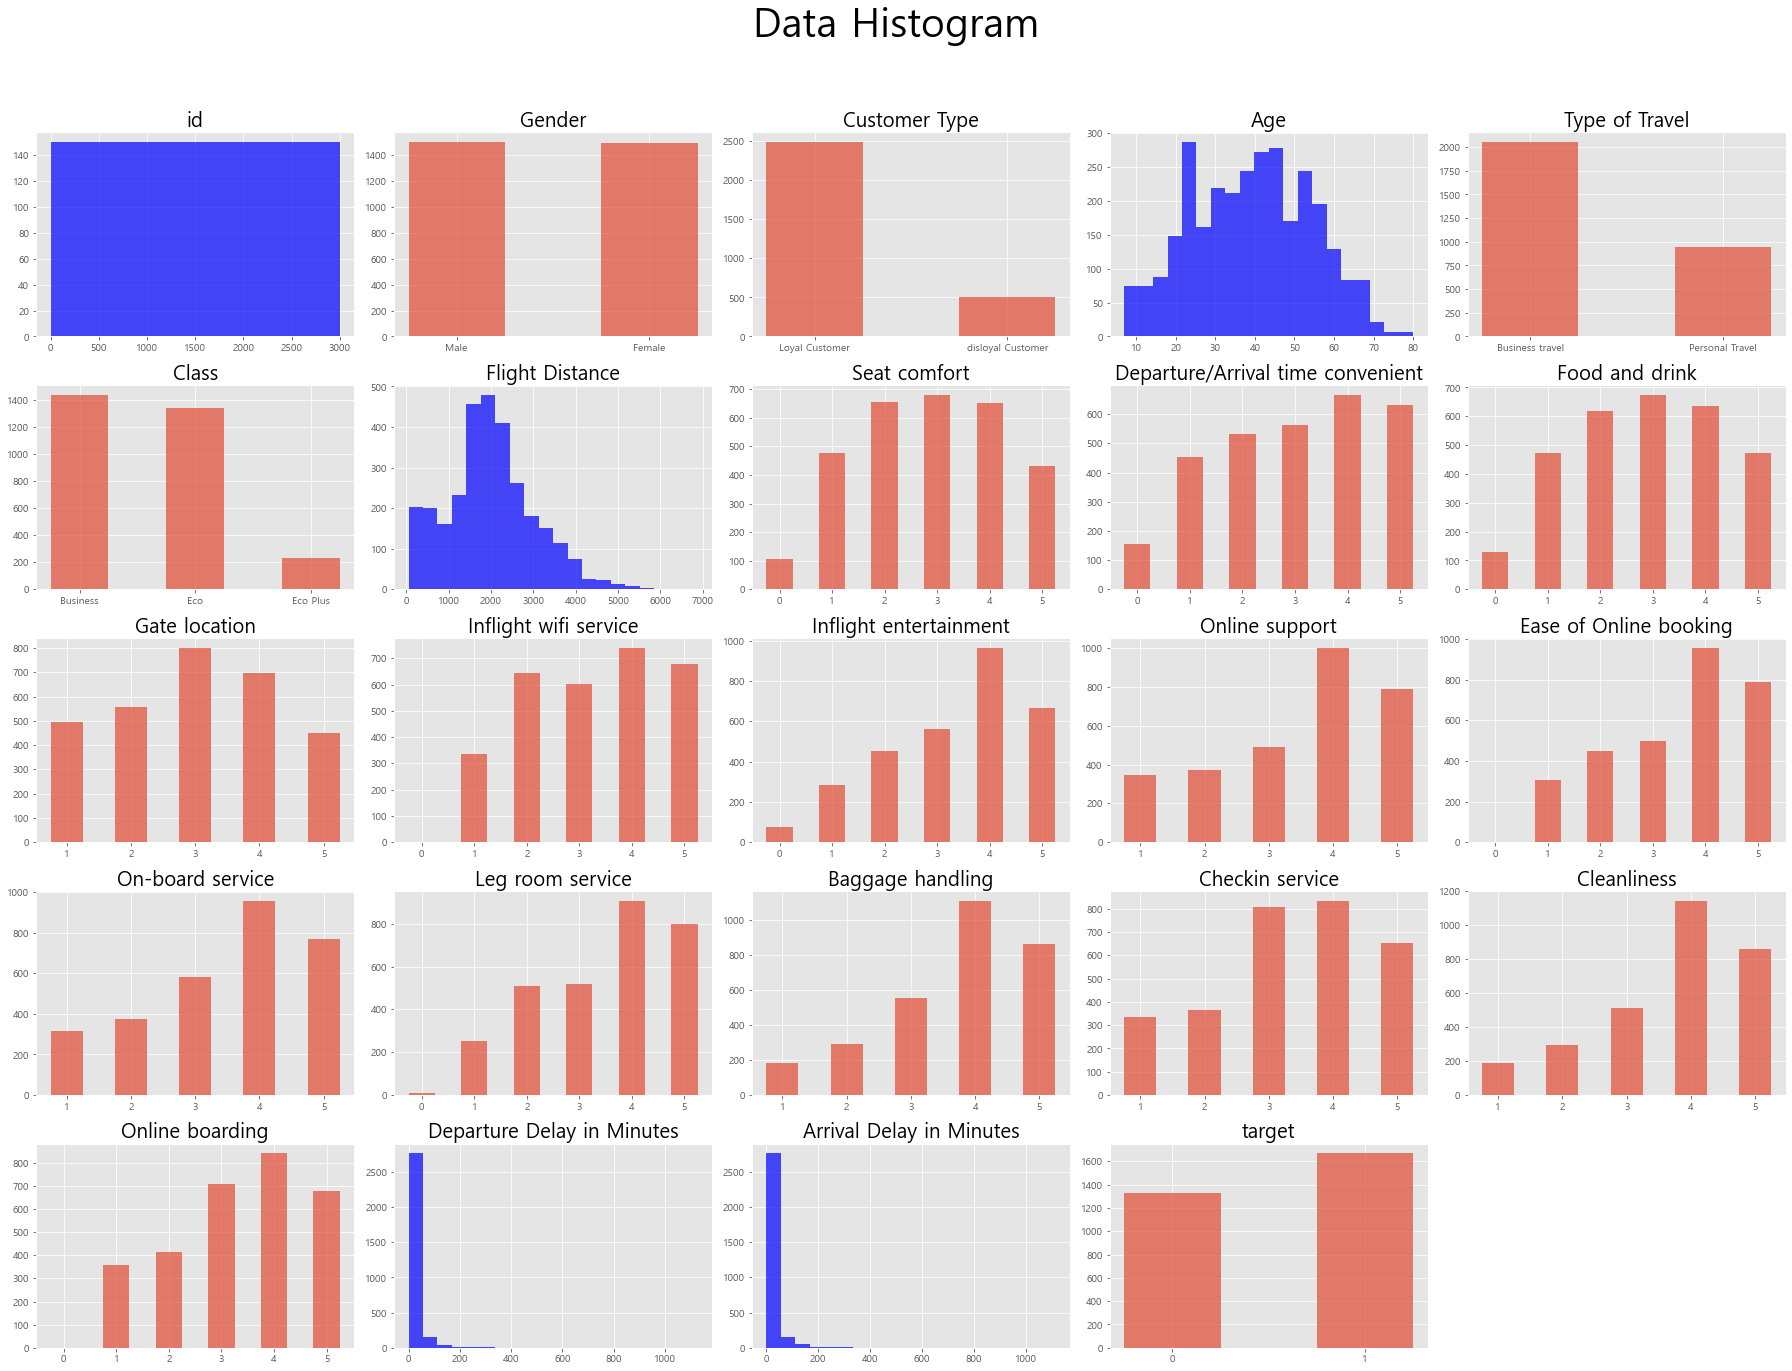

In [5]:
# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(25,20))
plt.suptitle("Data Histogram", fontsize=40)

# id는 제외하고 시각화합니다.
cols = train.columns
for i in range(len(cols)):
    plt.subplot(5,5,i+1)
    plt.title(cols[i], fontsize=20)
    if len(train[cols[i]].unique()) > 20:
        plt.hist(train[cols[i]], bins=20, color='b', alpha=0.7)
    else:
        temp = train[cols[i]].value_counts()
        plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
        plt.xticks(temp.keys())
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- train 데이터 내 1-5점 척도를 사용하는 변수들 중에 0인 데이터가 있음을 확인
- test 데이터 확인 결과 동일한 변수 내 0인 데이터 존재
- 0을 결측치로 인식하여 결측치 제거 또는 대체의 방법이 필요해보임

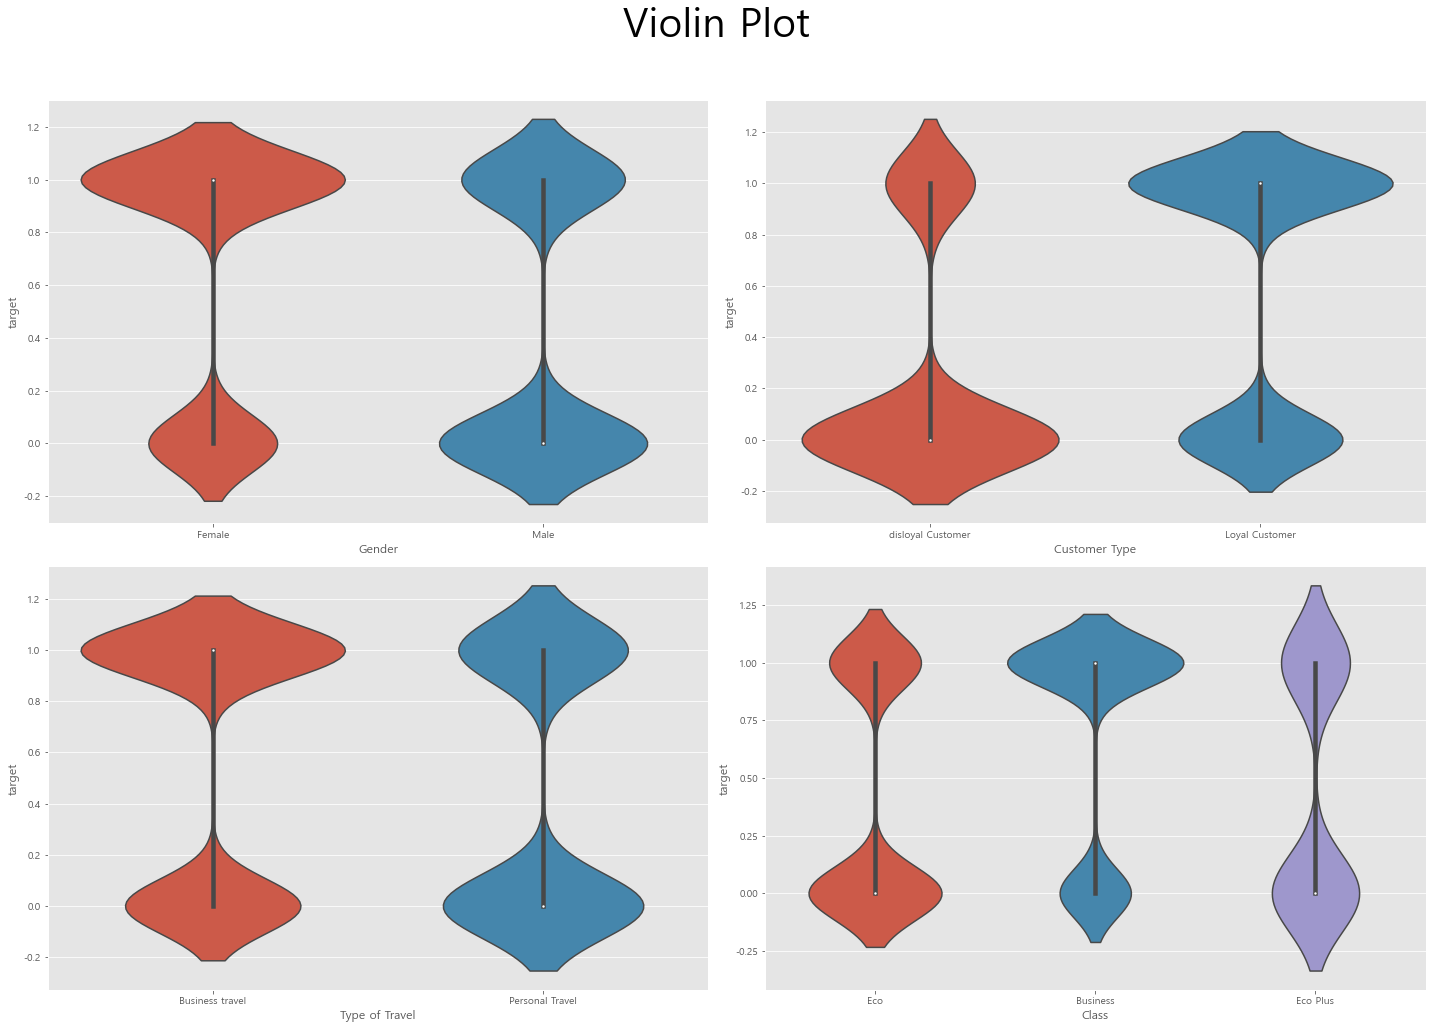

In [6]:
# 바이올린플랏(violinplot)을 통한 범주형 변수 데이터 분포 확인
# 타겟 설정
target = "target"
# 범주형 데이터 분리
categorical_feature = train.columns[train.dtypes=='object']

plt.figure(figsize=(20,15))
plt.suptitle("Violin Plot", fontsize=40)

# id는 제외하고 시각화합니다.
for i in range(len(categorical_feature)):
    plt.subplot(2,2,i+1)
    plt.xlabel(categorical_feature[i])
    plt.ylabel(target)
    sns.violinplot(x= train[categorical_feature[i]], y= train[target])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

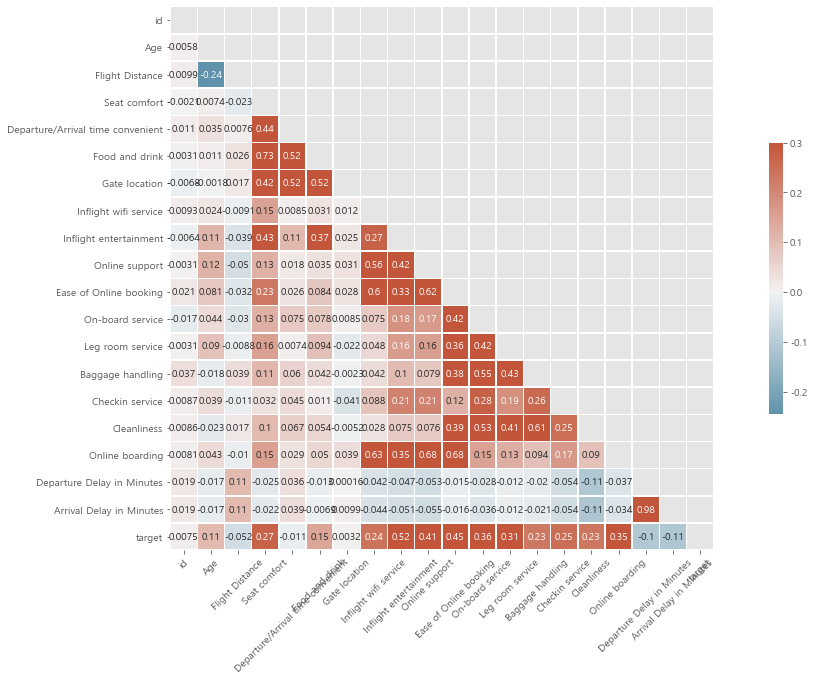

In [7]:
# 변수간 상관관계
corr = train.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(20,10))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.xticks(rotation=45)
plt.show()

- 상관관계 분석 결과 상관관계가 0.7이 넘는 변수 4개를 확인할 수 있었고, 특히 Departure Delay in Minutes와 Arrival Delay in Minutes는 거의 동일한 변수라고 보아도 무방하기에 둘 중 한개를 삭제하거나 따로 파생변수를 만들어 분석을 진행하여도 상관이 없어보임
- 다중공선성이 발생할 수 있으므로 변수를 삭제하여 분석 진행을 해볼 것

## 데이터 전처리

In [8]:
# 대회 평가지표
def ACCURACY(true, pred):   
    score = np.mean(true==pred)
    return score

In [9]:
# id 컬럼 제외, 다중공선성을 일으킬 수 있는 컬럼(Depature Delay in Minutes, Food And Drink) 제거
def dropcol(df):
    df = df.drop('id', axis=1)
#     df = df.drop('Departure Delay in Minutes', axis = 1)
#     df = df.drop('Food and drink', axis = 1)
    return df

# 파생변수
# 지연 여부 파생변수 (lastdefiance20님 코드 적용)
def derivedcol(df):
    df['Delayed'] = (df['Departure Delay in Minutes'] + df['Arrival Delay in Minutes']).apply(lambda x : 0 if x > 0 else 1)
# 만족도 컬럼 15개 평균 내보기
#     df['Overall'] = (df.iloc[:, 6:20].sum(axis=1)) / 15 
    return df    

- dropcol()과 derivedcol()은 사용한 결과, 사용하지 않았을 때가 더 모델링 성능이 좋은 것으로 보여 최종적으로는 사용하지 않음

In [10]:
# 순서형 범수 0 대체
# train[train['Leg room service'] == 0]

In [11]:
# 범주형 변수와 수치형 변수 따로 구분
catcol = train.select_dtypes(include='object').columns.to_list()
numcol = train.select_dtypes(exclude='object').columns.to_list()
numcol.remove('target') 
display(catcol); display(numcol)

['Gender', 'Customer Type', 'Type of Travel', 'Class']

['id',
 'Age',
 'Flight Distance',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [12]:
# 범주형 변수 라벨 인코딩
from sklearn.preprocessing import LabelEncoder
def lecol(df):
    features = catcol
    for f in features:
        le = LabelEncoder()
        le.fit(df.loc[:,f])
        df.loc[:,f] = le.transform(df.loc[:,f])
    return df

In [13]:
# 스케일러를 이용하여 변수 정규화
from sklearn.preprocessing import StandardScaler
def scalecol(df):
    scaler = StandardScaler()
    df[numcol] = scaler.fit_transform(df[numcol])
    return df

In [14]:
# 전처리 함수
def preprocessing(df):
    df = lecol(df)
    df = scalecol(df)
#     df = derivedcol(df)
    df = dropcol(df)
    return df

In [15]:
train = preprocessing(train)
test = preprocessing(test)

display(train); display(test) # 전처리 완료

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,0,1,-1.138798,0,1,-0.373641,0.097987,-1.980970,0.087801,-0.012875,0.559814,-0.260486,0.377730,0.393243,1.171271,0.397990,0.235125,0.500816,1.094577,0.497485,-0.346846,-0.352289,0
1,0,0,-0.145833,0,0,0.804446,-0.618989,0.651840,0.786480,0.759626,-1.708681,0.478831,-0.385361,1.161295,1.171271,0.397990,-1.497981,-1.884021,1.094577,-1.048299,0.052482,0.045978,0
2,1,0,0.449945,0,0,0.621556,-1.335964,-1.322768,-1.309557,-1.557877,0.559814,1.218147,1.140820,0.393243,0.391982,0.397990,0.235125,1.295761,0.233609,-0.275407,-0.346846,-0.352289,1
3,0,1,-1.006402,0,1,0.355003,0.097987,-0.006363,0.087801,-0.012875,-0.196351,-0.260486,-0.385361,-0.374810,-1.166595,0.397990,1.101677,-0.294130,0.233609,-0.275407,-0.124997,-0.308037,0
4,0,0,1.244317,0,0,-1.827036,0.097987,-0.006363,0.087801,-0.012875,0.559814,0.478831,1.140820,0.393243,0.391982,0.397990,0.235125,0.500816,0.233609,1.270377,-0.346846,-0.352289,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,0,-0.609217,1,1,0.383215,-1.335964,1.310042,-1.309557,-1.557877,-1.708681,0.478831,0.377730,-1.910915,-0.387306,1.170786,-0.631428,0.500816,-1.488326,0.497485,4.334167,4.626041,0
2996,0,1,-1.006402,0,1,-0.330837,-0.618989,0.651840,0.087801,0.759626,1.315980,-0.260486,1.140820,1.161295,-1.166595,-1.147602,0.235125,-1.884021,-0.627358,1.270377,0.096852,-0.064652,0
2997,0,1,-1.138798,0,1,-0.526374,-0.618989,-0.664565,-0.610878,-0.012875,0.559814,-0.999803,0.377730,0.393243,-0.387306,-1.147602,-0.631428,0.500816,-0.627358,0.497485,1.072987,1.130147,0
2998,0,1,-0.410624,0,0,0.170167,-0.618989,-0.664565,-0.610878,1.532127,0.559814,-0.999803,0.377730,0.393243,1.171271,-1.147602,1.101677,1.295761,1.094577,0.497485,-0.346846,-0.285911,0


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,0,1.420877,1,1,0.045637,-1.370054,-1.356120,-1.329940,-1.503988,-0.169228,1.190738,1.152606,1.202084,1.225153,1.174691,1.139036,-0.280177,1.150543,-0.259045,1.296408,1.461421
1,0,1,-0.837066,0,0,-0.136841,-1.370054,-1.356120,-1.329940,0.772482,-1.721774,-1.834318,-1.877577,-1.901070,-0.407296,0.392867,1.139036,0.513526,0.263463,-1.796401,-0.403471,-0.419534
2,0,0,0.823186,0,0,-0.350847,0.794898,0.631840,0.769965,0.772482,0.607046,-0.321790,0.395060,1.202084,1.225153,1.174691,1.139036,0.513526,1.150543,-0.259045,-0.403471,-0.419534
3,1,0,0.956006,0,0,1.475846,0.794898,0.631840,0.769965,0.772482,1.383319,0.434474,1.152606,-1.125281,-1.223521,-1.170782,-1.491532,1.307229,-1.510698,-1.796401,-0.403471,-0.419534
4,0,0,0.092675,0,1,-0.495110,0.794898,-0.030813,0.069997,0.013659,0.607046,0.434474,0.395060,0.426296,-0.407296,-1.952606,-1.491532,1.307229,0.263463,0.509634,-0.403471,-0.419534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1.487287,0,2,-1.848888,0.073248,-1.356120,-1.329940,-1.503988,0.607046,-0.321790,0.395060,-0.349493,-0.407296,-0.388958,-0.614676,-0.280177,-0.623617,-1.796401,-0.403471,-0.419534
1996,0,0,-0.438605,0,0,-0.049901,0.794898,0.631840,0.769965,0.772482,-0.169228,1.190738,1.152606,1.202084,1.225153,1.174691,1.139036,-1.867583,1.150543,-0.259045,2.762970,2.791062
1997,1,0,-0.704246,0,1,0.390531,0.073248,1.294493,0.769965,0.772482,-0.169228,-0.321790,-0.362486,-0.349493,-2.039746,-1.170782,-0.614676,0.513526,-1.510698,-0.259045,-0.403471,-0.322243
1998,0,0,0.756776,1,0,-1.512593,1.516549,-0.693467,1.469934,0.772482,0.607046,-0.321790,-0.362486,-1.125281,-1.223521,1.174691,-1.491532,-1.073880,-1.510698,-1.027723,2.496323,2.272178


## 모델링

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier
# !pip install catboost
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, KFold

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, cross_val_score

### 데이터 분리

In [17]:
# 데이터 분리
x = train.drop('target', axis=1)
y = train.loc[:, 'target']
display(x)
display(y)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,1,-1.138798,0,1,-0.373641,0.097987,-1.980970,0.087801,-0.012875,0.559814,-0.260486,0.377730,0.393243,1.171271,0.397990,0.235125,0.500816,1.094577,0.497485,-0.346846,-0.352289
1,0,0,-0.145833,0,0,0.804446,-0.618989,0.651840,0.786480,0.759626,-1.708681,0.478831,-0.385361,1.161295,1.171271,0.397990,-1.497981,-1.884021,1.094577,-1.048299,0.052482,0.045978
2,1,0,0.449945,0,0,0.621556,-1.335964,-1.322768,-1.309557,-1.557877,0.559814,1.218147,1.140820,0.393243,0.391982,0.397990,0.235125,1.295761,0.233609,-0.275407,-0.346846,-0.352289
3,0,1,-1.006402,0,1,0.355003,0.097987,-0.006363,0.087801,-0.012875,-0.196351,-0.260486,-0.385361,-0.374810,-1.166595,0.397990,1.101677,-0.294130,0.233609,-0.275407,-0.124997,-0.308037
4,0,0,1.244317,0,0,-1.827036,0.097987,-0.006363,0.087801,-0.012875,0.559814,0.478831,1.140820,0.393243,0.391982,0.397990,0.235125,0.500816,0.233609,1.270377,-0.346846,-0.352289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,0,-0.609217,1,1,0.383215,-1.335964,1.310042,-1.309557,-1.557877,-1.708681,0.478831,0.377730,-1.910915,-0.387306,1.170786,-0.631428,0.500816,-1.488326,0.497485,4.334167,4.626041
2996,0,1,-1.006402,0,1,-0.330837,-0.618989,0.651840,0.087801,0.759626,1.315980,-0.260486,1.140820,1.161295,-1.166595,-1.147602,0.235125,-1.884021,-0.627358,1.270377,0.096852,-0.064652
2997,0,1,-1.138798,0,1,-0.526374,-0.618989,-0.664565,-0.610878,-0.012875,0.559814,-0.999803,0.377730,0.393243,-0.387306,-1.147602,-0.631428,0.500816,-0.627358,0.497485,1.072987,1.130147
2998,0,1,-0.410624,0,0,0.170167,-0.618989,-0.664565,-0.610878,1.532127,0.559814,-0.999803,0.377730,0.393243,1.171271,-1.147602,1.101677,1.295761,1.094577,0.497485,-0.346846,-0.285911


0       0
1       0
2       1
3       0
4       1
       ..
2995    0
2996    0
2997    0
2998    0
2999    0
Name: target, Length: 3000, dtype: int64

In [18]:
#train_test_split을 이용해 검증 데이터 분리
x_train, x_val, y_train, y_val = train_test_split(x, y , test_size=0.2)
print(x_train.shape, y_train.shape)
print(x_val.shape,y_val.shape)

(2400, 22) (2400,)
(600, 22) (600,)


### 모델 구축

#### 분류 ML

In [19]:
# 모델을 담는 딕셔너리 만들기
dic_clf = {
'lr' : LogisticRegression(random_state=42),
'svc' : SVC(random_state=42),
'rf' : RandomForestClassifier(random_state=42),
'lgbc' : LGBMClassifier(random_state=42),
'xgbc' : XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
'dtc' : DecisionTreeClassifier(random_state=42),
'gbc' : GradientBoostingClassifier(random_state=42),
'cb' : CatBoostClassifier(random_state=42, logging_level='Silent')
}

In [20]:
# for문을 통해 딕셔너리에 담겨있는 모델 하나씩 fit을 해준 뒤 예측과 accuracy 확인
for clf, clfins in dic_clf.items():
    clfins.fit(x_train, y_train)
    
    globals()[f'y_pred_{clf}']= clfins.predict(x_val)
    globals()[f'{clf}_acc_score']= ACCURACY(y_val, globals()[f'y_pred_{clf}'])
    
    print(f'{clf}')
    print('Accuracy : ', round(globals()[f'{clf}_acc_score'], 3))
    print('-'*50)

lr
Accuracy :  0.823
--------------------------------------------------
svc
Accuracy :  0.895
--------------------------------------------------
rf
Accuracy :  0.913
--------------------------------------------------
lgbc
Accuracy :  0.922
--------------------------------------------------
xgbc
Accuracy :  0.927
--------------------------------------------------
dtc
Accuracy :  0.865
--------------------------------------------------
gbc
Accuracy :  0.91
--------------------------------------------------
cb
Accuracy :  0.928
--------------------------------------------------


In [21]:
# test 예측
for clf, clfins in dic_clf.items():
    globals()[f'{clf}model'] = clfins.fit(x_train, y_train)
    
    globals()[f'y_pred_test_{clf}']= clfins.predict(test)
    sub.target = globals()[f'y_pred_test_{clf}']
    sub.to_csv(f'{clf}_submission.csv', index=False)

In [22]:
results = pd.DataFrame({
    '모델': dic_clf.keys(),
    'Accuracy': [
        lr_acc_score, svc_acc_score, rf_acc_score, lgbc_acc_score,
        xgbc_acc_score, dtc_acc_score, gbc_acc_score, cb_acc_score],
})
results.sort_values(by='Accuracy', ascending=False)

,모델,Accuracy
7,cb,0.928333
4,xgbc,0.926667
3,lgbc,0.921667
2,rf,0.913333
6,gbc,0.910000
1,svc,0.895000
5,dtc,0.865000
0,lr,0.823333


- 모델링 결과, 정돈된 데이터를 사용해서인지 튜닝 없이도 모델 성능이 좋게 나오는 것을 확인 가능
    - CatBoost, XGBoost, LightGBM 순
- 최종 제출 : CatBoost + XGBoost Soft Voting Model (튜닝 X)

### hyperparameter tuning
- 최종 제출에는 튜닝하지 않은 모델을 앙상블한 모델을 사용하였지만, 보다 분류 모델 성능을 더 올리기 위해 앙상블 기법 적용
- 앙상블 기법에 사용할 모델 : CatBoost, XGBoost
- KFold와 RandomizedGridSearchCV를 이용하여 하이퍼파리미터 튜닝 진행
- CatBoost는 하이퍼파라미터튜닝의 의미가 별로 없기에 XGBoost만을 튜닝

#### RandomizedGridSearchCV

In [23]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42); kfold

KFold(n_splits=5, random_state=42, shuffle=True)

#### XGBoost

In [24]:
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(x_train, y_train)
y_pred_xgb_def = xgb.predict(x_val)
print(ACCURACY(y_val, y_pred_xgb_def))

0.9266666666666666


In [26]:
# RandomizedGridSearchCV를 이용하여 하이퍼파라미터 튜닝
parameters = {
    "n_estimators": [480, 477, 490, 485, 500],
    "learning_rate": [0.1],
    "max_depth": [2, 3, 4, 5, 6, 7, 8],
    "colsample_bytree": [0.3, 0.6, 0.9, 1, 1.3]
}
# RGS
n_iter_search = 20
xgbr = RandomizedSearchCV(xgb,
                          param_distributions=parameters,
                          n_iter=n_iter_search,
                          cv=kfold,
                          scoring="accuracy",
                          random_state=42)

xgbc_rgs = xgbr.fit(x_train, y_train)
y_pred_xgb_rgs = xgbc_rgs.predict(x_val)

ACCURACY(y_val, y_pred_xgb_rgs)

0.9216666666666666

In [27]:
sub.target = xgbc_rgs.predict(test)
sub.to_csv('xgb_rgs_submission.csv', index=False)

In [28]:
xgb_rgs_001 = xgbc_rgs.best_estimator_; xgb_rgs_001 # 0.935

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9,
              enable_categorical=False, eval_metric='logloss', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=477, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

#### 앙상블

In [34]:
vot_soft = VotingClassifier(estimators=[('cb', cbmodel), ('xgb', xgb_rgs_001)], voting="soft", weights=[2, 1])
vot_soft.fit(x_train, y_train)
y_pred_vot_soft_val = vot_soft.predict(x_val)
y_pred_vot_soft_test = vot_soft.predict(test)
sub.target = y_pred_vot_soft_test
sub.to_csv('cb_xgb_soft_submission.csv', index=False)
vot_soft_acc_score = ACCURACY(y_val, y_pred_vot_soft_val)
print('Catboost & XGBoost Soft Voting Result :', vot_soft_acc_score)

Catboost & XGBoost Soft Voting Result : 0.9316666666666666


In [35]:
vot_hard = VotingClassifier(estimators=[('cb', cbmodel), ('xgb', xgb_rgs_001)], voting="hard")
vot_hard.fit(x_train, y_train)
y_pred_vot_hard_val = vot_hard.predict(x_val)
y_pred_vot_hard_test = vot_hard.predict(test)
sub.target = y_pred_vot_hard_test
sub.to_csv('cb_xgb_hard_submission.csv', index=False)
vot_hard_acc_score = ACCURACY(y_val, y_pred_vot_hard_val)
print('Catboost & XGBOOST Hard Voting Result :', vot_hard_acc_score)

Catboost & XGBOOST Hard Voting Result : 0.93
